In [1]:
import pandas as pd

In [29]:
occ_data = {}
i = 0
for ts in pd.date_range(start='10/1/2021', end='09/30/2023', freq='M'):
    eom = ts.strftime('%Y%m%d')
    print(pd.Timestamp.now())
    print(eom)
    
    url = f'https://marketdata.theocc.com/volume-query?format=csv&reportDate={eom}&volumeQueryType=O&symbolType=ALL&reportType=M&accountType=ALL&productKind=ALL&porc=BOTH'
    c = pd.read_csv(url)
    
    mask = c['underlying'].isin(['SPY','QQQ', 'SPX', 'NDX', 'IWM', 'RUT', 'DIA'])
    dict_index = c[mask].groupby('actype')['quantity'].sum().to_dict()
    dict_index = {f'Index Options - {k}':v for k,v in dict_index.items()}
    dict_equity = c[~mask].groupby('actype')['quantity'].sum().to_dict()
    dict_equity = {f'Equity Options - {k}':v for k,v in dict_equity.items()}
    options_row = dict(list(dict_index.items()) + list(dict_equity.items()))
    
    occ_data[eom] = options_row
#     i += 1
#     if i == 3:
#         break

2023-10-17 20:47:41.516695
20211031
2023-10-17 20:50:23.263257
20211130
2023-10-17 20:53:08.969516
20211231
2023-10-17 20:55:54.785683
20220131
2023-10-17 20:58:28.430432
20220228
2023-10-17 21:01:12.073548
20220331
2023-10-17 21:03:36.355198
20220430
2023-10-17 21:05:47.946137
20220531
2023-10-17 21:08:20.459517
20220630
2023-10-17 21:10:23.543600
20220731
2023-10-17 21:12:21.155739
20220831
2023-10-17 21:14:51.251432
20220930
2023-10-17 21:17:00.442100
20221031
2023-10-17 21:19:03.159161
20221130
2023-10-17 21:21:17.623704
20221231
2023-10-17 21:23:18.608894
20230131
2023-10-17 21:25:10.210320
20230228
2023-10-17 21:26:50.848773
20230331
2023-10-17 21:31:49.622836
20230430
2023-10-17 21:33:20.922558
20230531
2023-10-17 21:35:21.290911
20230630
2023-10-17 21:37:15.918982
20230731
2023-10-17 21:39:21.451245
20230831
2023-10-17 21:41:16.685050
20230930


In [32]:
occdf = pd.DataFrame.from_records(occ_data).T
occdf['Index Options'] = occdf['Index Options - C'] + occdf['Index Options - F'] + occdf['Index Options - M']
occdf['Equity Options'] = occdf['Equity Options - C'] + occdf['Equity Options - F'] + occdf['Equity Options - M']

Text(0.5, 1.0, 'Option Volume')

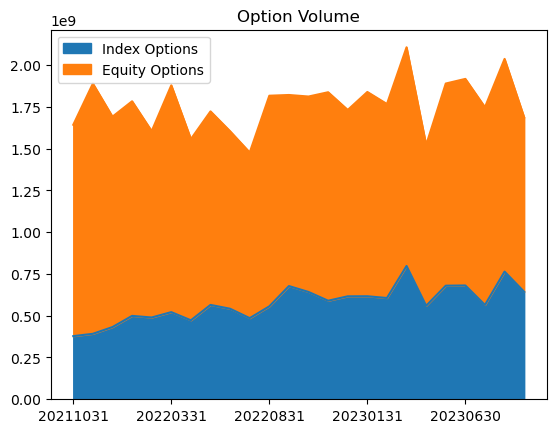

In [36]:
ax = occdf[['Index Options', 'Equity Options']].plot.area()
ax.set_title('Option Volume')

Text(0.5, 1.0, 'Option Volume')

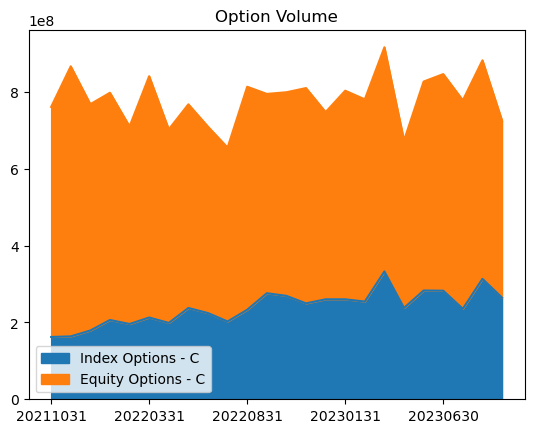

In [37]:
ax = occdf[['Index Options - C', 'Equity Options - C']].plot.area()
ax.set_title('Option Volume')

Text(0.5, 1.0, 'Cust Option Volume')

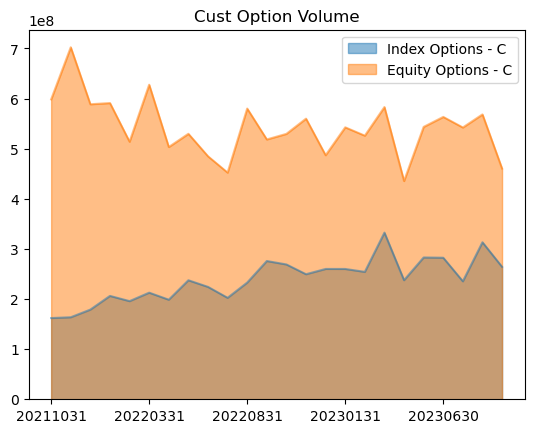

In [39]:
ax = occdf[['Index Options - C', 'Equity Options - C']].plot.area(stacked=False)
ax.set_title('Cust Option Volume')